# Import statements

In [ ]:
import os
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

2.17.0


# Model

First we load MobileNet model

In [ ]:
conv_base = MobileNet(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))
#conv_base.summary()

Add new top layers (decoder)

In [20]:
# Number of classes
N=5

# Add new top layer
x = conv_base.output #the output of base model to go into top layers
x = GlobalAveragePooling2D()(x) #notsure
x = Dense(1024,activation='relu')(x) #dense layer, dafuq
preds = Dense(N,activation='softmax')(x) #final layer with softmax activation to make class predictions

# Specify model, combination of encoder and customised top layer
model = Model(inputs=conv_base.input, outputs=preds)

Define a function for getting a specified number of classes

In [17]:
def get_classes(n: int):
    dog_class_directory = os.getcwd()+'/dog_classes'
    return os.listdir(dog_class_directory)[:n]

# See the classes to train on
get_classes(5)

['1043-n000001-Shiba_Dog',
 '1121-n000002-French_bulldog',
 '1160-n000003-Siberian_husky',
 '1324-n000004-malamute',
 '1936-n000005-Pomeranian']

Define the training set and dataset. Both are of type `Dataloader`

In [18]:
dog_class_directory = os.getcwd()+'/dog_classes'

selected_classes = get_classes(5)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=dog_class_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=selected_classes,   # Specify the classes to load
    image_size=(224, 224),          # Resize to the target size
    batch_size=8,
    subset = "training",
    validation_split =0.2,
    shuffle=True,
    seed=123
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=dog_class_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=selected_classes,   # Specify the classes to load
    image_size=(224, 224),          # Resize to the target size
    batch_size=8,
    subset = "validation",
    validation_split =0.2,
    shuffle=True,
    seed=123
)


Found 6584 files belonging to 5 classes.
Using 5268 files for training.
Found 6584 files belonging to 5 classes.
Using 1316 files for validation.


Define the optimizer and train the model

In [19]:
sgd_optimizer = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Compile model - make it trainable
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# Since the dataset already takes care of batching,
# we don't pass a `batch_size` argument.
history = model.fit(train_dataset, 
          validation_data=val_dataset, 
          epochs=10)

Epoch 1/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 269s 390ms/step - accuracy: 0.7365 - loss: 0.6813 - val_accuracy: 0.9020 - val_loss: 0.2630
Epoch 2/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 2523s 4s/step - accuracy: 0.9056 - loss: 0.2369 - val_accuracy: 0.9088 - val_loss: 0.2676
Epoch 3/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 299s 454ms/step - accuracy: 0.9394 - loss: 0.1831 - val_accuracy: 0.9126 - val_loss: 0.2645
Epoch 4/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 296s 449ms/step - accuracy: 0.9622 - loss: 0.1108 - val_accuracy: 0.9210 - val_loss: 0.2770
Epoch 5/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 296s 450ms/step - accuracy: 0.9704 - loss: 0.0891 - val_accuracy: 0.9043 - val_loss: 0.3059
Epoch 6/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 296s 450ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9141 - val_loss: 0.2820
Epoch 7/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 354s 537ms/step - accuracy: 0.9834 - loss: 0.0484 - val_accuracy: 0.9187 - val_loss: 0.2908
Epoch 8/10
659/659 ━━━━━━━━━━━━━━━━━━━━ 243s 368ms/step - accuracy: 0.9846 - l

Plot `accuracy` against `epochs`.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


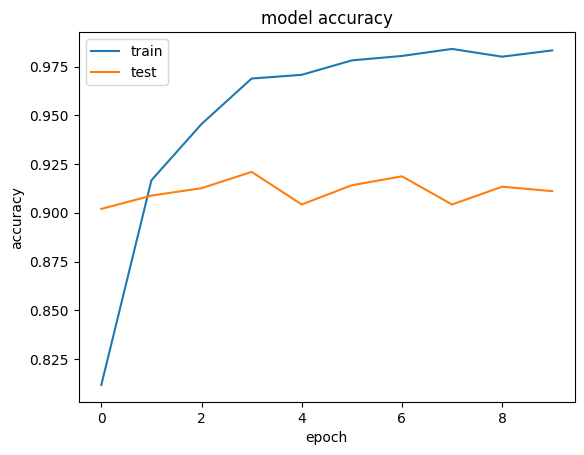

In [21]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot `loss` against `epochs`

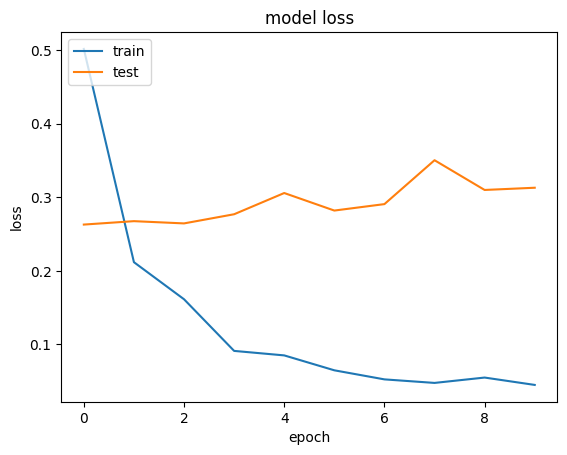

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()